<a href="https://colab.research.google.com/github/hamza-dev-12/pytorch/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

**Gradinets**

In [ ]:
x = torch.tensor([1,2,3],requires_grad=True,dtype=torch.float32)
y = x * x
print(y)


tensor([1., 4., 9.], grad_fn=<MulBackward0>)


In [ ]:
y = y.mean()
#you need a constant value before computing the gradient
print(y)

tensor(4.6667, grad_fn=<MeanBackward0>)


In [ ]:
#back propagation to compute gradients
y.backward()
#print the gradients
print(x.grad)

tensor([0.6667, 1.3333, 2.0000])


**Intuation for how gradient is computed**

x = [x1,x2,x3]

y = (x1^2 + x2 ^ 2 + x3^2 ) / 3  #we have computed the mean

dy/dx1 = 0.3 * 2 * x1 == 0.6 * x1

x1 = 1

0.6 * 1 --> 0.6

**Clearing The Gradient**

In [ ]:
weights = torch.tensor([1,2,3])
x.grad.zero_()
for epoch in range(2):
  z = torch.sum(weights * x) + 0 # bias is 0

  z.backward()
  print(x.grad) #inital gradient and the newly computed gradient are added up

  #in order to clear the previous gradient

  x.grad.zero_()


tensor([1., 2., 3.])
tensor([1., 2., 3.])


**Disabling gradient Calculation**

When you are inferring you do not want to compute the gradients as it is unecessary

In [ ]:
with torch.no_grad():
  z = x + 2
  print(z)

tensor([3., 4., 5.])


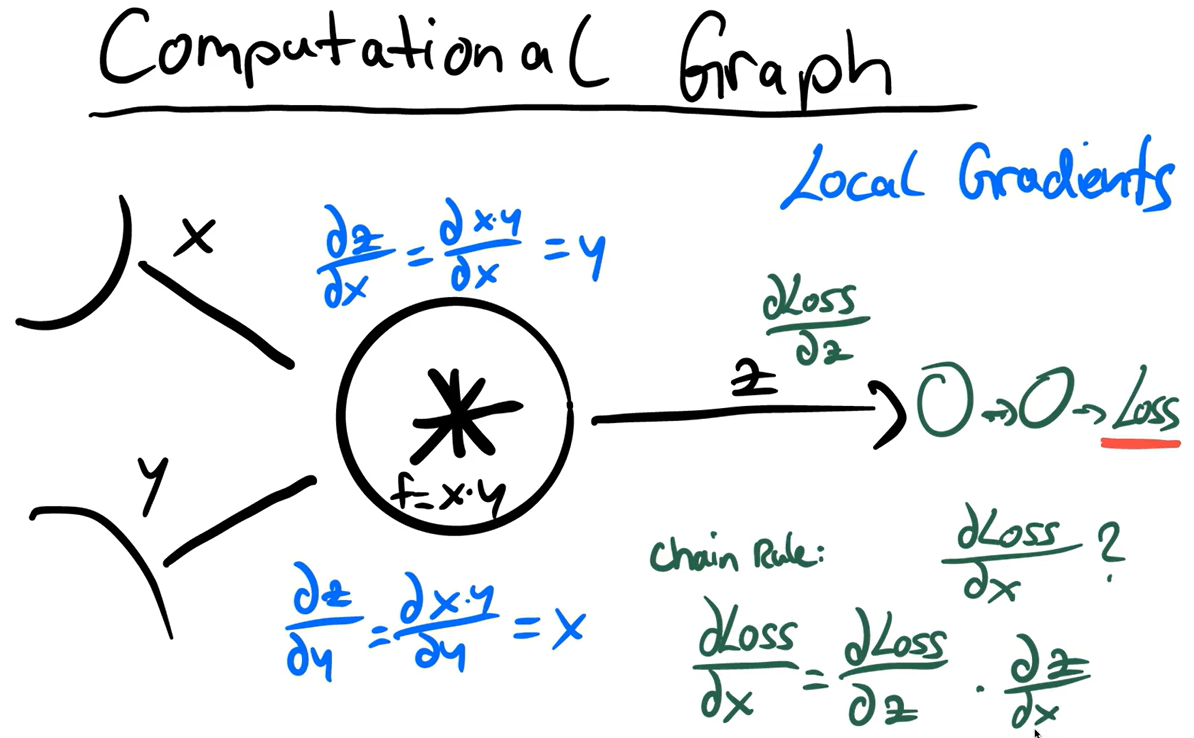

**Gradient Descent Using AutoGrad and BackPropagation**

In [ ]:
import numpy as np
x = np.array([1,2,3,5],dtype=float)
y = np.array([3,5,7,11]) # y = f(x) = 2 * x + 1

x = torch.tensor(x,dtype=torch.float32)
y = torch.tensor(y,dtype=torch.float32)

w = torch.tensor(1.0,requires_grad = True)
print(w,x,y)

bias = torch.tensor(0,dtype=torch.float32,requires_grad = True)
lr = 0.01
for epoch in range(200):
  y_hat = w * x + bias

  loss = (1/2 * (y_hat - y)**2).mean()

  print(loss.data)
  #back propagation
  loss.backward()
  with torch.no_grad(): # we dont want compuation graph to keep track of this step(updating weights)
    w.data = w.data - lr * w.grad
    bias.data = bias.data - lr * bias.grad

  w.grad.zero_()
  bias.grad.zero_()

print(w * 7 + bias,' actual is 15')

**Using Optimizer And nn to Build the Model**

In [ ]:
import torch
from torch import nn

class LinearRegression(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LinearRegression,self).__init__()
    self.lin = nn.Linear(input_dim,output_dim)

  def forward(self,x):
    return self.lin(x)

model = LinearRegression(1,1)

optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

X = torch.tensor([[1],[2],[3]],dtype=torch.float32) # shape --> (number_of_training_examples , number_of_features)
Y = torch.tensor([[1],[4],[9]],dtype=torch.float32)

#defining the losss function
loss = nn.MSELoss()
for epoch in range(150):
  #forward pass
  y_hat = model(X)
  l = loss(Y,y_hat)

  #back propagation
  l.backward()

  #update weights
  optimizer.step()

  optimizer.zero_grad()
  weight , bias = model.parameters()
  #print(weight.item() ,'   ' ,bias.item())
  print(l.item())


model(torch.tensor([5],dtype=torch.float32))

**Linear Regression**

![image.png](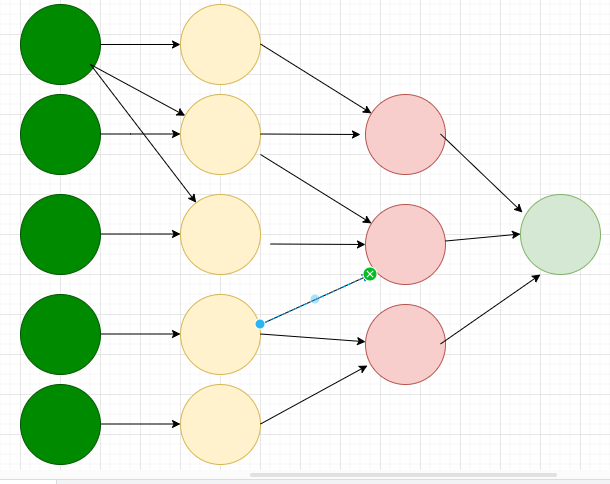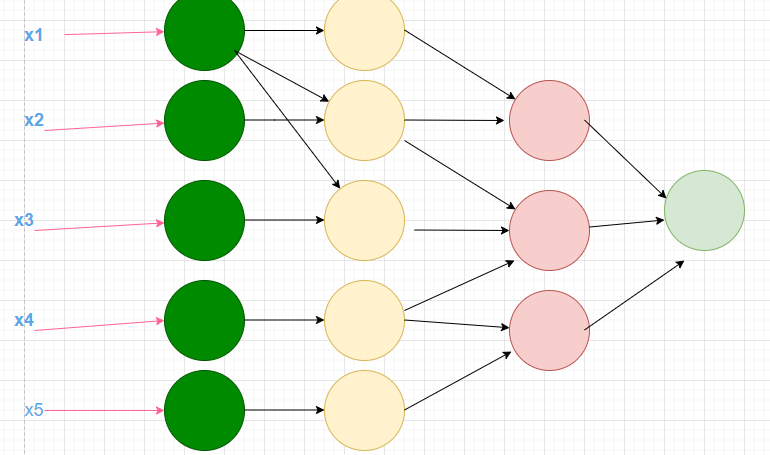)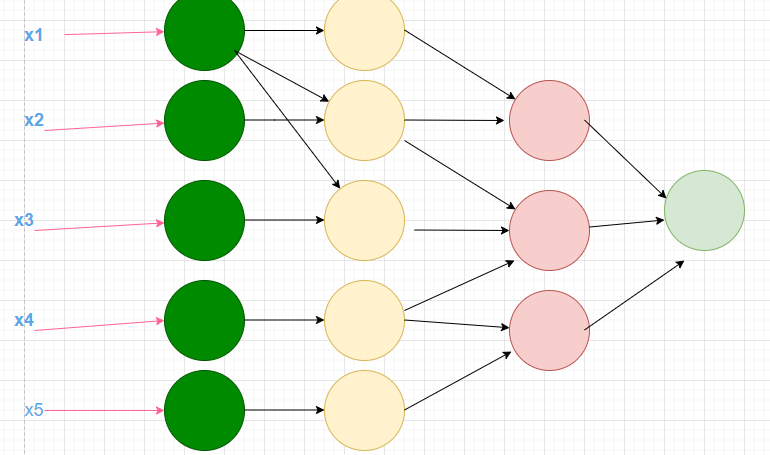

In [100]:
import torch
from torch import nn
from sklearn import datasets
import numpy as np
'''
There are basically 4 steps
1)Datset
2)Designing your model
3)setting optimzer and loss function
4)Training Loop
  - forward pass
  - backward propagation
  - adjust weights
  - clear the weights
'''
X_numpy  , Y_numpy = datasets.make_regression(n_samples=25,n_features=5,noise=5,random_state=1)
X_numpy /= 10
#print(type(X_numpy))
# x = torch.from_numpy(X_numpy)
# y = torch.from_numpy(Y_numpy)
x = torch.tensor(X_numpy,dtype=torch.float32)
y = torch.tensor(Y_numpy,dtype=torch.float32)
y = y.view(y.shape[0],1)

n_samples , n_features = x.shape

class LRModel(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LRModel,self).__init__()
    #nn.Linear(x,y) --> x is inputs and y determines the no of nodes in that layer(output dim)
    self.input_layer = nn.Linear(input_dim,input_dim)
    self.hidden_layer_1 = nn.Linear(input_dim,input_dim)
    self.hidden_layer_2 = nn.Linear(input_dim,3)
    self.output_layer = nn.Linear(3,output_dim)
    self.dropout = nn.Dropout(p=0.5)

  def forward(self,x):
    in_output = self.input_layer(x)
    x = self.dropout(x)
    hid1_output = self.hidden_layer_1(in_output)
    hid1_output = self.dropout(hid1_output)
    hid2_output = self.hidden_layer_2(hid1_output)
    final_output = self.output_layer(hid2_output)
    #print(final_output)
    return final_output

model = LRModel(n_features,1)


In [101]:
from torchsummary import summary

summary(model,(1,5))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 5]              30
           Dropout-2                 [-1, 1, 5]               0
            Linear-3                 [-1, 1, 5]              30
           Dropout-4                 [-1, 1, 5]               0
            Linear-5                 [-1, 1, 3]              18
            Linear-6                 [-1, 1, 1]               4
Total params: 82
Trainable params: 82
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [102]:
print(y[:10])
print(x[:5])

tensor([[  -4.4739],
        [ 231.0686],
        [ 100.4456],
        [ -85.7585],
        [ -78.8663],
        [ -66.5099],
        [ 128.9243],
        [-123.8472],
        [ -33.8283],
        [ -82.1450]])
tensor([[ 0.0119,  0.1129,  0.0378, -0.0671,  0.0122],
        [-0.0076, -0.1396,  0.1520,  0.1132,  0.2186],
        [-0.1101,  0.0901,  0.0902,  0.1145,  0.0502],
        [ 0.0300, -0.0209, -0.1143, -0.0352, -0.0349],
        [-0.0192,  0.0051, -0.0747, -0.0888,  0.1692]])


In [103]:
optimizer = torch.optim.SGD(model.parameters(),lr=5e-5)
loss = nn.MSELoss()
loss_list = []
epoch_list = []
for epoch in range(100):
  #forward pass
  y_hat = model(x)

  #compute the loss
  l = loss(y,y_hat)

  #back propagation
  l.backward()

  #ajust weights
  optimizer.step()

  #clear weight
  optimizer.zero_grad()
  loss_list.append(l.item())
  epoch_list.append(epoch)
  print(l)


tensor(9490.2559, grad_fn=<MseLossBackward0>)
tensor(9491.5117, grad_fn=<MseLossBackward0>)
tensor(9487.3496, grad_fn=<MseLossBackward0>)
tensor(9488.8916, grad_fn=<MseLossBackward0>)
tensor(9490.5576, grad_fn=<MseLossBackward0>)
tensor(9474.0176, grad_fn=<MseLossBackward0>)
tensor(9489.9492, grad_fn=<MseLossBackward0>)
tensor(9488.9814, grad_fn=<MseLossBackward0>)
tensor(9491.8320, grad_fn=<MseLossBackward0>)
tensor(9483.8096, grad_fn=<MseLossBackward0>)
tensor(9493.8779, grad_fn=<MseLossBackward0>)
tensor(9488.7686, grad_fn=<MseLossBackward0>)
tensor(9485.7402, grad_fn=<MseLossBackward0>)
tensor(9485.9111, grad_fn=<MseLossBackward0>)
tensor(9497.8633, grad_fn=<MseLossBackward0>)
tensor(9491.2793, grad_fn=<MseLossBackward0>)
tensor(9484.9971, grad_fn=<MseLossBackward0>)
tensor(9487.2539, grad_fn=<MseLossBackward0>)
tensor(9497.0947, grad_fn=<MseLossBackward0>)
tensor(9491.1064, grad_fn=<MseLossBackward0>)
tensor(9487.5352, grad_fn=<MseLossBackward0>)
tensor(9503.3770, grad_fn=<MseLoss

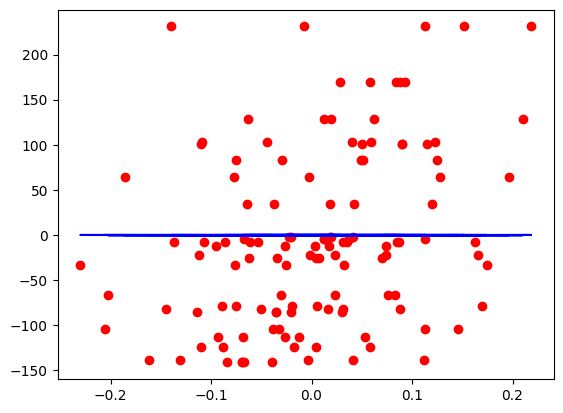

In [104]:
prediction = model(x)
plt.plot(x,y,'ro')
plt.plot(x,prediction.detach().numpy(),'b-')